<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [14]:
movies = pd.read_csv('../../classes/unit-2_project-master/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [15]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [16]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [12]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [36]:
# Answer:
movies.sort_values('duration',inplace=True)
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

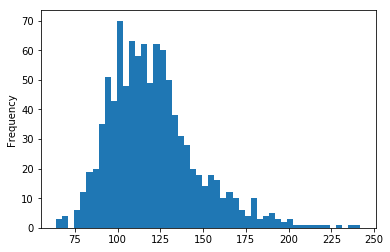

In [20]:
# Answer:
movies['duration'].plot(kind='hist',bins=50)

#### Use a box plot to display that same data.

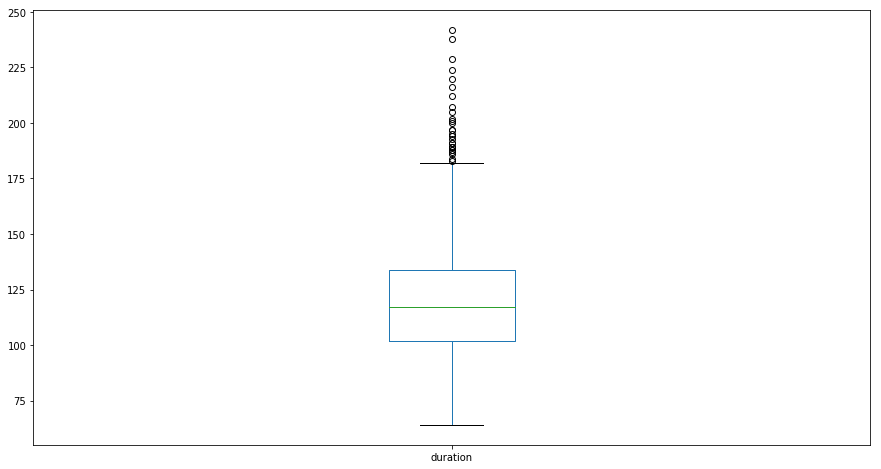

In [40]:
# Answer:
movies.duration.plot(kind='box',figsize=(15,8))

## Intermediate level

#### Count how many movies have each of the content ratings.

In [63]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,0,'Rating Name')

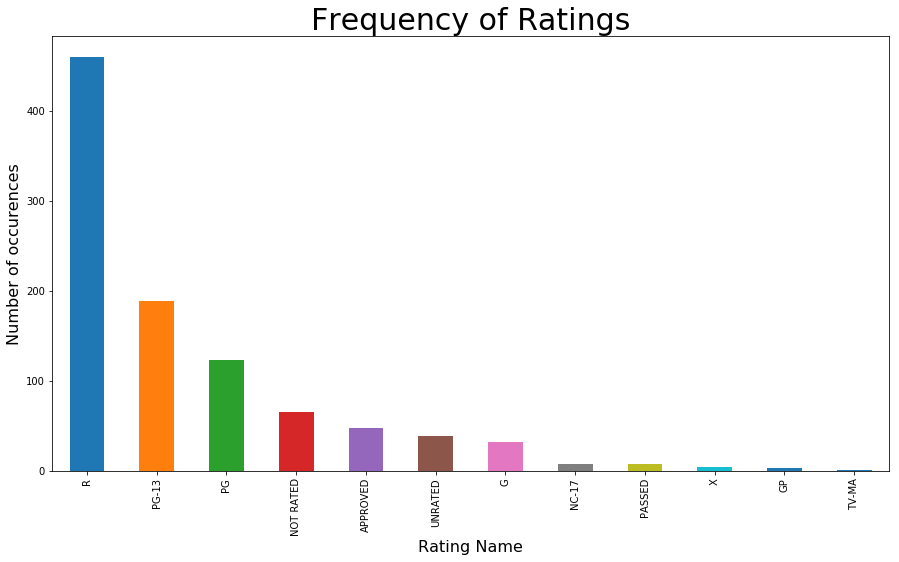

In [74]:
# Answer:
ax = movies.content_rating.value_counts().plot(kind='bar',figsize=(15,8))
ax.set_title('Frequency of Ratings',loc='center',fontsize=30)
ax.set_ylabel('Number of occurences',fontsize=16)
ax.set_xlabel('Rating Name',fontsize=16)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [159]:
# Answer:
movies['content_rating'].replace(to_replace='NOT RATED',value='UNRATED',inplace=True)
movies['content_rating'].replace(to_replace='APPROVED',value='UNRATED',inplace=True)
movies['content_rating'].replace(to_replace='PASSED',value='UNRATED',inplace=True)
movies['content_rating'].replace(to_replace='GP',value='UNRATED',inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         125
G           33
NC-17       12
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [93]:
# Answer:
movies['content_rating'].replace(to_replace='X',value='NC-17',inplace=True)
movies['content_rating'].replace(to_replace='TV-MA',value='NC-17',inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [108]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [127]:
# Answer:
df_missing = movies[movies['content_rating'].isnull()]
df_missing

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [136]:
movies.content_rating.loc[187] = 'PG'
movies.content_rating.loc[936] = 'G'
movies.content_rating.loc[649] = 'PG'
movies.loc[[187, 936, 649]]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [158]:
# Answer:

short_movies = movies[movies.duration < 120]
long_movies = movies[movies.duration >= 120]

print('Average star rating for movies shorter than 2 hours is',short_movies.star_rating.sum() / short_movies.star_rating.count())
print('Average star rating for movies 2 hours or longer is',long_movies.star_rating.sum() / long_movies.star_rating.count())

Average star rating for movies shorter than 2 hours is 7.838666666666667
Average star rating for movies 2 hours or longer is 7.948898678414097


#### Use a visualization to detect whether there is a relationship between duration and star rating.

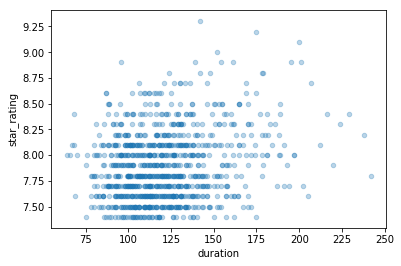

In [164]:
# Answer:

movies.plot(kind='scatter', x='duration', y='star_rating',alpha=0.3)

#no relationship

#### Calculate the average duration for each genre.

In [374]:
# Answer:

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0.5,1,'boxplot of movie durations in each content rating')

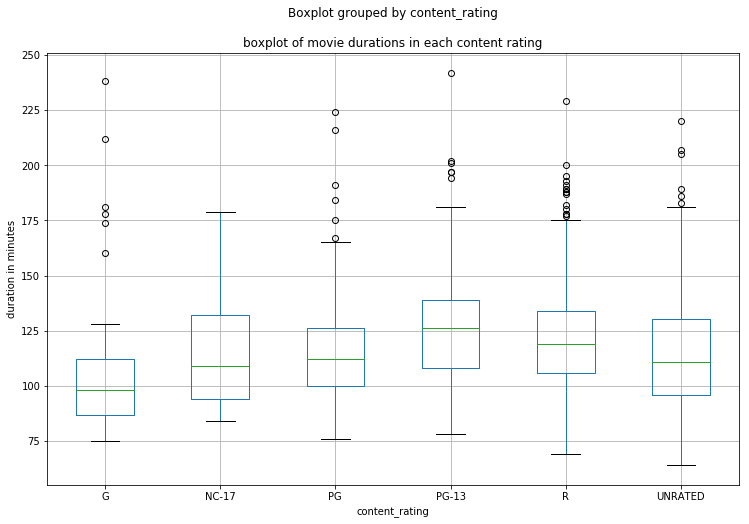

In [223]:
# Answer:

movies.boxplot('duration',by='content_rating',figsize=(12,8))
plt.ylabel('duration in minutes')
plt.title('boxplot of movie durations in each content rating')

#### Determine the top rated movie (by star rating) for each genre.

In [272]:
# Answer:

genres = movies.genre.unique()

def topMovie(dataframe,genres):
    for g in genres:
        g_df = dataframe[dataframe['genre'] == g].sort_values('star_rating',ascending=False)
        print('The top rated movie in',g,'is',g_df.title.iloc[0],'with a rating of',g_df.star_rating.iloc[0])

topMovie(movies,genres)


The top rated movie in Drama is 12 Angry Men with a rating of 8.9
The top rated movie in History is Battleship Potemkin with a rating of 8.0
The top rated movie in Crime is The Shawshank Redemption with a rating of 9.3
The top rated movie in Comedy is Life Is Beautiful with a rating of 8.6
The top rated movie in Mystery is Rear Window with a rating of 8.6
The top rated movie in Horror is Psycho with a rating of 8.6
The top rated movie in Animation is Spirited Away with a rating of 8.6
The top rated movie in Action is The Dark Knight with a rating of 9.0
The top rated movie in Western is The Good, the Bad and the Ugly with a rating of 8.9
The top rated movie in Biography is Schindler's List with a rating of 8.9
The top rated movie in Film-Noir is The Third Man with a rating of 8.3
The top rated movie in Adventure is The Lord of the Rings: The Return of the King with a rating of 8.9
The top rated movie in Sci-Fi is Blade Runner with a rating of 8.2
The top rated movie in Family is E.T. t

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [236]:
# Answer:

movies[movies.duplicated('title',keep=False)]

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [313]:
# Answer:

genres = movies.genre.unique()
genres10 = []

def genres10_avg_rating(dataframe,genres):
    for g in genres:
        genre_count = dataframe[dataframe.genre==g].genre.count()
        if genre_count >= 10:
            genres10.append(g)
    for g10 in genres10:
        genres10_count = dataframe[dataframe.genre==g10].genre.count()
        genre_rating_sum = dataframe[dataframe.genre==g10].star_rating.sum()
        genre_avg = genre_rating_sum / genres10_count
        print('The',g10,'genre has',genres10_count,'movies and an average star rating of',genre_avg)

genres10_avg_rating(movies,genres)



The Drama genre has 278 movies and an average star rating of 7.902517985611509
The Crime genre has 124 movies and an average star rating of 7.916935483870968
The Comedy genre has 156 movies and an average star rating of 7.822435897435897
The Mystery genre has 16 movies and an average star rating of 7.975
The Horror genre has 29 movies and an average star rating of 7.806896551724138
The Animation genre has 62 movies and an average star rating of 7.9145161290322585
The Action genre has 136 movies and an average star rating of 7.884558823529413
The Biography genre has 77 movies and an average star rating of 7.862337662337665
The Adventure genre has 75 movies and an average star rating of 7.933333333333332


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [373]:
# Answer:

genreValCountList = movies.genre.value_counts()
relevant_genres = genreValCountList[genreValCountList.values >=10].index
relevant_genres

#2nd half of answer would be the same as that in option 1

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [383]:
# Answer:
movies.groupby('genre').star_rating.mean().where(movies.groupby('genre').genre.count()>=10).dropna()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [386]:
# Answer:

genre_agg = movies.groupby('genre').star_rating.agg(['count','mean'])
genre_average = genre_agg[genre_agg['count'] >=10]
genre_average['mean']

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [450]:
#find the cast which has acted together with the highest occurence in the dataset

print('The cast of ',movies.actors_list.describe().loc['top'],'has worked together in a total of ',movies.actors_list.describe().loc['freq'],'movies  - the highest number in this dataset')

The cast of  [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint'] has worked together in a total of  6 movies  - the highest number in this dataset


---
# Comments

Well done.

Good job in looking at those movies without rating and filling in accordingly. Good insights on the actors data too.


- Make use of cell comments and markdown to document down your thought process (helpful for project handover and future reviews)
- [36] sort the movies and get the titles with the longest and shortest duration.
- Do include a regression line when you use scatterplot to show the relationship.	

